<a href="https://www.kaggle.com/code/dawid9632/ecommerce-customers?scriptVersionId=111311466" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-customers/Ecommerce Customers.csv


In [2]:
df = pd.read_csv("/kaggle/input/ecommerce-customers/Ecommerce Customers.csv")
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df['Time on Website']

0      39.577668
1      37.268959
2      37.110597
3      36.721283
4      37.536653
         ...    
495    36.417985
496    37.190268
497    38.332576
498    36.840086
499    35.771016
Name: Time on Website, Length: 500, dtype: float64

In [6]:
# deleting columns not needed
df = df.drop(df.columns[[0, 1, 2]], axis=1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


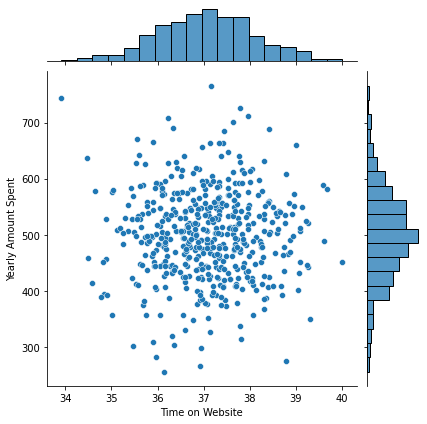

In [7]:
# checking if there is any correlation between TIME ON WEBSITE and YEARLY AMOUNT SPENT (none..)
sns.jointplot(df['Time on Website'], df['Yearly Amount Spent'], data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


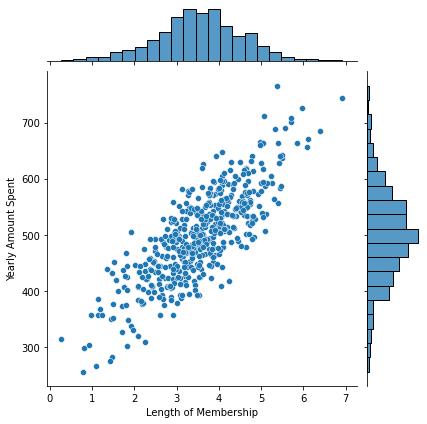

In [8]:
# checking if there is any correlation between LENGTH OF MEMBERSHIP and YEARLY AMOUNT SPENT (yes..)
sns.jointplot(df['Length of Membership'], df['Yearly Amount Spent'], data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


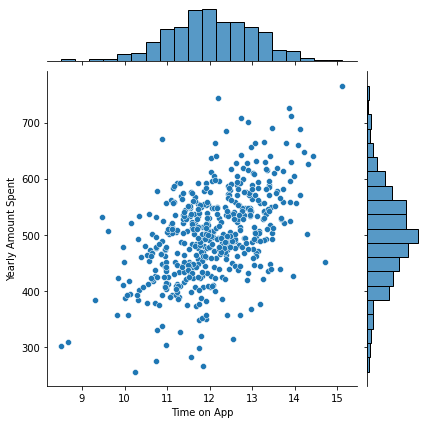

In [9]:
sns.jointplot(df['Time on App'], df['Yearly Amount Spent'], data=df)

In [10]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

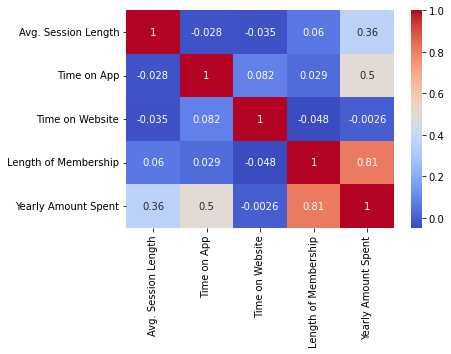

In [11]:
sns.heatmap(data= df.corr(), annot=True, cmap="coolwarm")

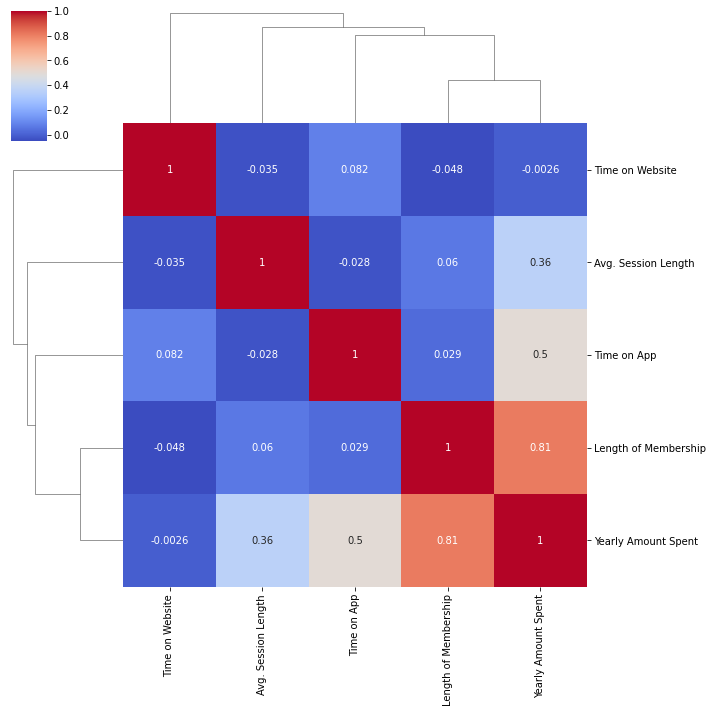

In [12]:
sns.clustermap(data= df.corr(), annot=True, cmap="coolwarm")

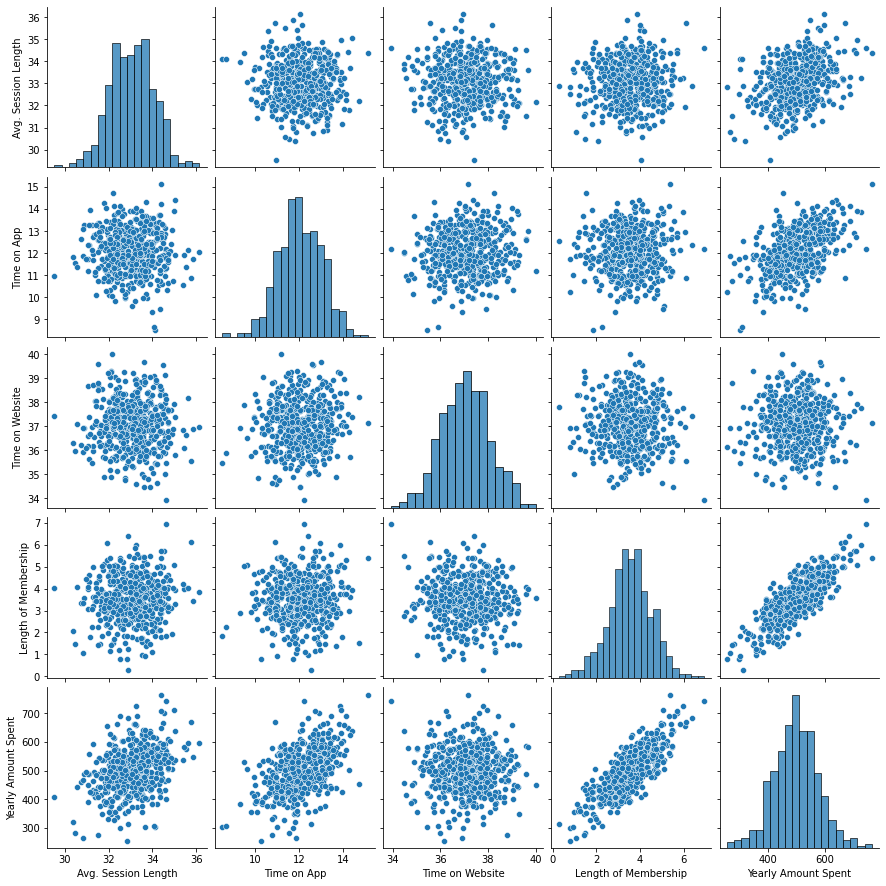

In [13]:
sns.pairplot(df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


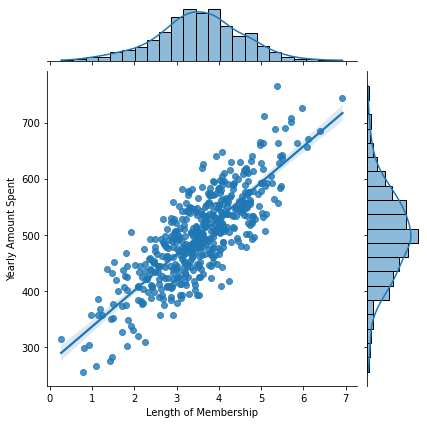

In [14]:
sns.jointplot(df['Length of Membership'], df['Yearly Amount Spent'], df, kind='reg' )

# Training and Testing Data

In [15]:
# Useing model_selection.train_test_split from sklearn to split the data into training and testing sets. Setting test_size=0.3 and random_state=101

In [16]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [17]:

X = df.drop(columns=(['Yearly Amount Spent']))


In [18]:
y = df['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
# spliting the data into TRAINING set and TESTING set in order to test the model when trained
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True)

In [21]:
# Import LinearRegression from sklearn.linear_model 
from sklearn.linear_model import LinearRegression


In [22]:
# Creating an instance of a LinearRegression() model named lm.
lm = LinearRegression()

In [23]:
# Training/fitting lm on the training data
lm.fit(X_train,y_train)

LinearRegression()

In [24]:
# coefficients
print('Coefficients \n', lm.coef_)

Coefficients 
 [25.98154972 38.59015875  0.19040528 61.27909654]


# Predicting Test Data

In [25]:

predictions = lm.predict( X_test)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Yearly Amount Spent'>

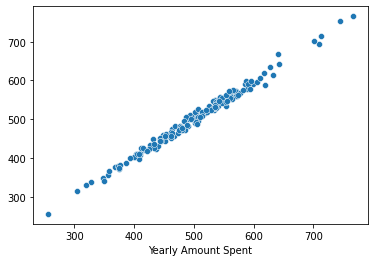

In [26]:
# plt.pyplot.scatter(y_test,predictions)
# plt.xlabel('Y Test')
# plt.ylabel('Predicted Y')

sns.scatterplot(y_test,predictions)

# Evaluating the Model

In [27]:
from sklearn import metrics

In [28]:
# Absolute Error is the amount of error in your measurements. It is the difference between the measured value and “true” value
# The Mean Absolute Error(MAE) is the average of all absolute errors.

metrics.mean_absolute_error(y_test, predictions)

7.228148653430826

In [29]:
# The mean squared error (MSE) tells you how close a regression line is to a set of points.
# The lower the MSE, the better the forecast.
# The smaller the mean squared error, the closer you are to finding the line of best fit.'''

metrics.mean_squared_error(y_test, predictions)

79.81305165097427

In [30]:
# MSE and MAE, are usually highly affected by outliers.
# Outliers are one of the causes of pushing mean loss value up. 
# We therefore calculate the median absolute loss which usually drops the mean absolute error


np.sqrt(metrics.mean_squared_error(y_test, predictions))

8.933815066978624

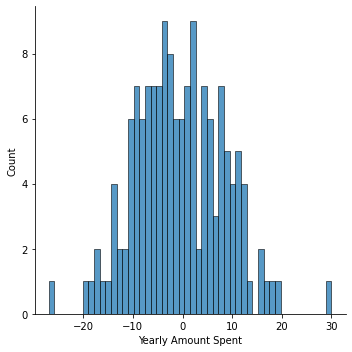

In [31]:
# Plotting a histogram of the residuals to make sure it looks normally distributed.
sns.displot((y_test-predictions),bins=50);

In [32]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

1. Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
2. Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
3. Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
4. Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.